# Project: Investigate a Dataset - Analysis of Medical no-show-appointments

## Table of Contents
- [Introduction](#Introduction)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions](#Conclusions)

## Introduction

### Dataset Description 

The selected dataset for analysis will be 'no-show-appointments'. This dataset collect 100 thousand medical appointments in Brazil. The dataset primary focus is understand the factors influencing patient attendance at their appointments. 
The analysis will include the following columns: PatientId, Gender, Age, Hipertension, Diabetes, Alcoholism, Handcap, SMS-received, and No-show.


### Question(s) for Analysis

Are there any correlation between the patient's gender and age and their likelihood of attending medical appointments ? 

Can we find any correlation between the medical conditions of patients, specifically Hypertension and Diabetes, and the probability of them attending their appointments? 

In [3]:
# Import all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

The dataset will be loaded here and prepared for cleaning.


### General Properties

In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


First, investigate our dataset by examining its shape, information, duplicates, and outliers.

In [5]:
df.shape

(110527, 14)

The dataset's shape reveals that it contains 14 columns and over 100,000 appointment records.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can observe that there are no missing values in the dataset. 

Furthermore need to change column name 'PatientId' to 'Patient_id' and 'Hipertension' to 'Hypertension' for better readability, 
Additionally, we will convert the 'PatientId' datatype to integer.

Several columns will be dropped, including 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship', 'Alcoholism', 'Handcap', and 'SMS_received'."

In [7]:
df.duplicated(subset='PatientId').sum()

48228

In [8]:
df['PatientId'].nunique()

62299

In [9]:
df['AppointmentID'].nunique()

110527

In [10]:
sum(df.duplicated())

0

We can confirm no diplicated value found. 
We have duplicates in the PatientId column but the unque number of data in 'PatientId' and 'AppointmentId' shows that can caused by the patient multiple scheduling.

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
outliers = df[(df['Age'] < 0) | (df['Age'] > 100)]
print(outliers['Age'])

58014    102
63912    115
63915    115
68127    115
76284    115
90372    102
97666    115
99832     -1
Name: Age, dtype: int64


Further investigation shows there are some outliers within the dataset. 102 years of age is possible but the -1 and 115 must be an error.
Outliers will be fixed by applying the mean value to them as any deletion can cause inaccurate or biased result.


### Data Cleaning
Data has been inspected and is now ready for cleaning. 
First, we need to drop any columns that are not needed for the analysis.
 

In [13]:
df.drop(columns=['AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship', 'Alcoholism' , 'Handcap', 'SMS_received'], inplace=True)
df.head()

,PatientId,Gender,Age,Hipertension,Diabetes,No-show
0,2.987250e+13,F,62,1,0,No
1,5.589978e+14,M,56,0,0,No
2,4.262962e+12,F,62,0,0,No
3,8.679512e+11,F,8,0,0,No
4,8.841186e+12,F,56,1,1,No


Change column name 'PatientId' to 'Patient_id', 'Hipertension' to 'Hypertension' and 'PatientId' datatype to int64.

In [14]:
df.rename(columns={'PatientId': 'Patient_id', 'Hipertension': 'Hypertension'}, inplace=True)
df['Patient_id'] = df['Patient_id'].astype('int64')
df.head()

,Patient_id,Gender,Age,Hypertension,Diabetes,No-show
0,29872499824296,F,62,1,0,No
1,558997776694438,M,56,0,0,No
2,4262962299951,F,62,0,0,No
3,867951213174,F,8,0,0,No
4,8841186448183,F,56,1,1,No


Apply the mean value to the outliers in the 'Age' column.

In [15]:
mean_age = df['Age'].mean()
mean_age_int = int(mean_age)

df.loc[(df['Age'] < 0) | (df['Age'] > 102), 'Age'] = mean_age_int
df['Age'] = df['Age'].astype('int64')

Here is our final dataset:

In [16]:
df.head()

,Patient_id,Gender,Age,Hypertension,Diabetes,No-show
0,29872499824296,F,62,1,0,No
1,558997776694438,M,56,0,0,No
2,4262962299951,F,62,0,0,No
3,867951213174,F,8,0,0,No
4,8841186448183,F,56,1,1,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 6 columns):
Patient_id      110527 non-null int64
Gender          110527 non-null object
Age             110527 non-null int64
Hypertension    110527 non-null int64
Diabetes        110527 non-null int64
No-show         110527 non-null object
dtypes: int64(4), object(2)
memory usage: 5.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will proceed with the Data Analysis phase to address the research questions outlined earlier.


### Research Question 1: 

### Are there any correlation between the patient's gender and age and their likelihood of attending medical appointments ?

In [119]:
#Function for all the pie charts

def my_pie_chart(df, xVar, titles=['Without', 'With'], labels=['Show', 'No Show'], explode=[0, 0.06], colors=sns.color_palette('pastel')[2:5]):
    plot = df.groupby(xVar)['No-show'].value_counts().unstack(xVar).plot(kind='pie', subplots=True, figsize=(16, 8), startangle=90,
                                                                    explode=explode, autopct='%1.2f%%', labels=labels, colors=colors)
    
    plot[0].set_title(f'{titles[0]} {xVar}', fontsize=14, weight='bold')  
    plot[1].set_title(f'{titles[1]} {xVar}', fontsize=14, weight='bold')
    
    plot[0].set_ylabel('')
    plot[1].set_ylabel('')
    
    plt.suptitle(f'Appointment Attendance by {xVar.title()}', weight='bold', fontsize=15)  


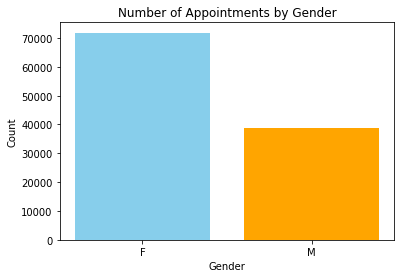

In [108]:
# Count the appointments by gender in a barh chart

gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Appointments by Gender')
plt.show()

This graph reveal that much more females made an appointment then males.

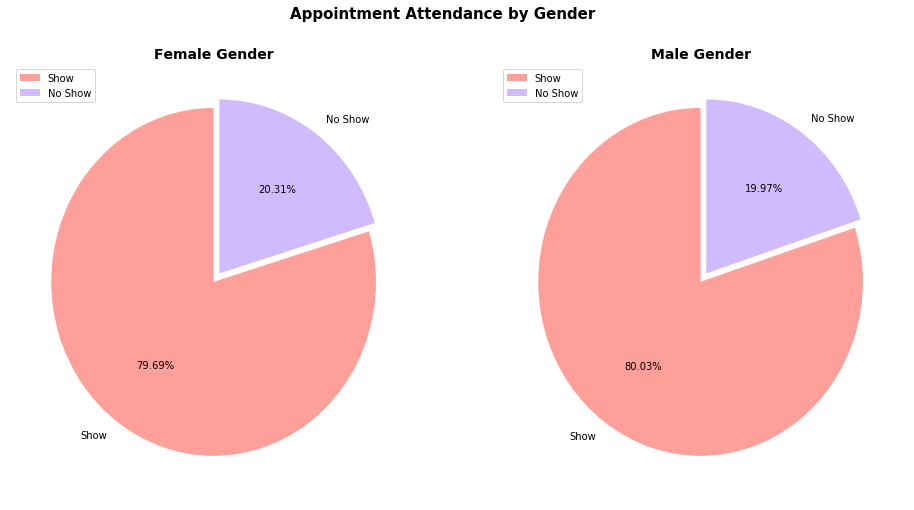

In [120]:
# Calculate females and males who showed up and did not show up in a pie chart

my_pie_chart(df, 'Gender', titles=['Female', 'Male'])

This pie chart shows that most of the females and males both showed up to their appointment.

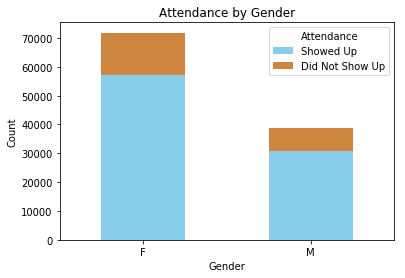

In [81]:
# Group data by 'Gender' and 'No-show' and create bar chart

grouped = df.groupby(['Gender', 'No-show']).size().unstack()
stack = grouped.plot(kind='bar', stacked=True, color=['skyblue', 'peru'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attendance by Gender')
plt.xticks(rotation=0)
plt.legend(title='Attendance', labels=['Showed Up', 'Did Not Show Up'])
plt.show()

We can conclude that there are no significant different between male and female and their attendance.

In [82]:
df['Age'].describe()

count    110527.000000
mean         37.085689
std          23.103979
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

We observe that the ages of the patients range from 0 to 102 years.

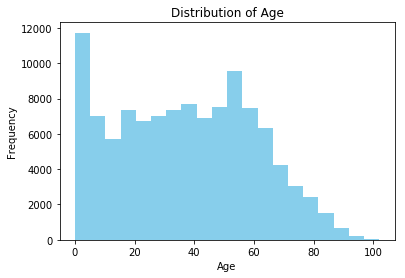

In [83]:
# create a histogram

plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The histogram above displays the distribution of patient ages, the majority of patients patients' ages fall within the 0 to 60 range.

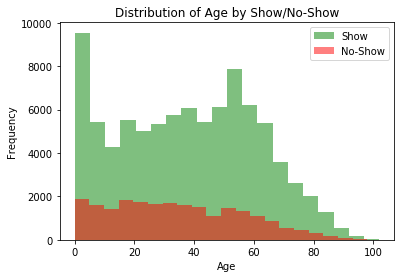

In [132]:
# Create histogram for both Show/No-Show

show_data = df[df['No-show'] == 'No']
no_show_data = df[df['No-show'] == 'Yes']
plt.hist(show_data['Age'], bins=20, color='green', alpha=0.5, label='Show')
plt.hist(no_show_data['Age'], bins=20, color='red', alpha=0.5, label='No-Show')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Show/No-Show')
plt.legend()
plt.show()

The graph clearly displays the proportion of show/no-show cases, with a significantly higher number of patients showing up for their appointments in all age groups.

### Research Question 2:

### Can we find any correlation between the medical conditions of patients, specifically Hypertension and Diabetes, and the probability of them attending their appointments?

In [142]:
# make function for bar chart

def condition_count(df, condition_col, condition_name, colors=['skyblue', 'orange']):
    condition_counts = df[condition_col].value_counts()
    axes = plt.bar(condition_counts.index, condition_counts, color=colors)
    
    plt.xlabel(condition_name)
    plt.ylabel('Count')
    plt.title(f'Count of People with {condition_name}', fontsize=14, fontweight='bold')
    for i, count in enumerate(condition_counts):
        axes[i].set_label(f"{condition_name}\n{count}")
    
    legend_labels = [f'No {condition_name}', condition_name]
    plt.legend(legend_labels)
    
    plt.xticks(condition_counts.index, [f'No {condition_name}', condition_name])
    plt.tight_layout()
    plt.show()

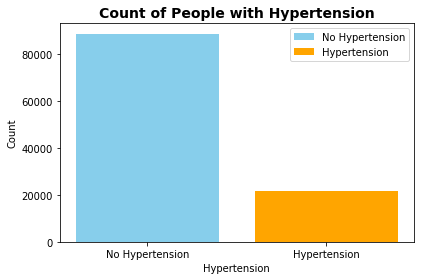

In [143]:
# Calculate the counts of people with and without Hypertension

condition_count(df, 'Hypertension', 'Hypertension')

First, let's visualize the number of patients with Hypertension. The chart reveals that there are more than 20 thousand people with Hypertension.

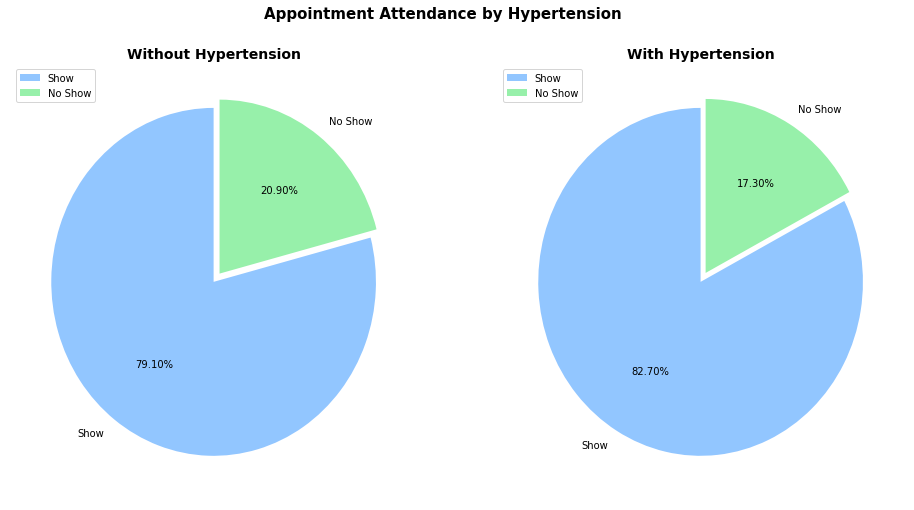

In [121]:
# create pie chart count without and with Hypertension patient and their show up 

my_pie_chart(df, 'Hypertension', colors=sns.color_palette('pastel')[0:5])

The chart reveal that 82.7% of the patient with Hypertension, and 79,1% of the patient without Hypertension showed up to their appointment.

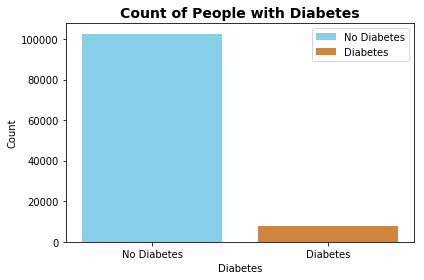

In [144]:
condition_count(df, 'Diabetes', 'Diabetes', colors=['skyblue', 'peru'])

The chart provides insights into the ratio of patients with and without Diabetes.We can observe that there are approximately 8,000 patients with Diabetes.

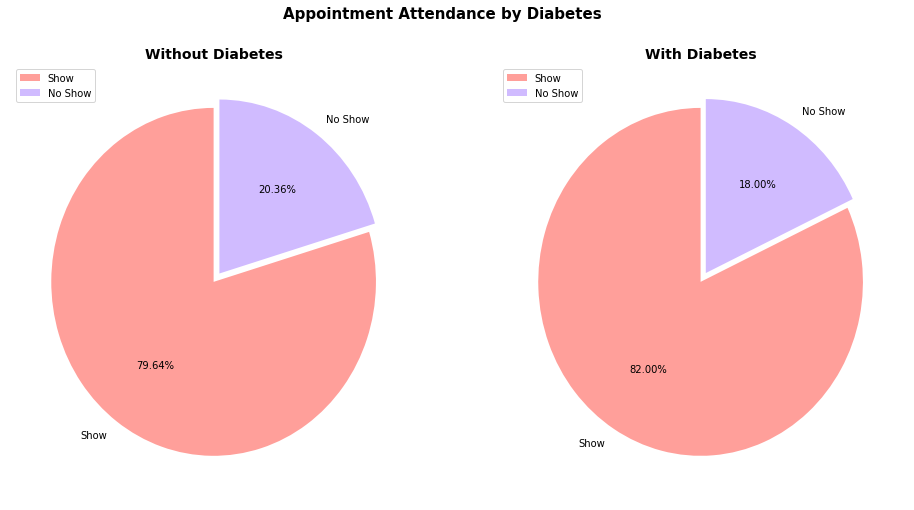

In [122]:
# create pie chart without and with Diabetes patient 

my_pie_chart(df, 'Diabetes', colors=sns.color_palette('pastel')[2:5])

The chart reveals that the majority of the patients with and without Diabetes showed up to their appointments.


<a id='conclusions'></a>
## Conclusions

In summary, our analysis provided valuable insights into appointment attendance patterns. 

We observed a balanced attendance rate between genders, indicating no significant gender-based differences despite a much higher female patient records.

The majority of patients ages fall within the 0 to 60 range. Patients with a very young babies and people between 50-60 showed up more to their appointment. 

Regarding medical conditions, both patients with and without hypertension and diabetes displayed similar attendance rates, suggesting that these factors might not strongly impact attendance behavior. Overall, we can observe that most of the patient show up to their medical appointment.


### Limitation
We observed a substantial gap in the number of female and male records. It prompts the question: Could we achieve similar results with an equivalent number of male records?


In [137]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0